In [58]:
import sys

In [59]:
#print(sys.path)

In [61]:
import os

In [ ]:
vcapsvcs_str = '''
{
    "xsuaa" : [ {
      "name" : "python-ml-uaa",
      "label" : "xsuaa",
      "tags" : [ "xsuaa" ],
      "plan" : "default",
      "credentials" : {
        "tenantmode" : "dedicated",
        "clientid" : "sb-na-193ff3e7-922d-4068-969d-1b0f53aa7951",
        "verificationkey" : "-----BEGIN PUBLIC KEY-----MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAsYtDBo6f+SHpxVJ+2fwnIVdSzrbuoP6lFYRfZ29soZ0XSw51IHoa3ew4t8Ep7d15ua3r7ZZCf3wteGkSO+0QdcJwak0lAEygdD9uVlANLZmu9jZMKmOcn/65XDyn++YJWQt2o5AS6Kz4XLQGSOVReQbfchcMiqJhebCtEAFTb0oYtxYjGY4dWqGnJFpv2iL/oRs304JGogaxz7cUzQiUkLDK6/elsbWAtvu+H6R1vitt/EEsHkYh3+/V5/Rf3+G16IKxIFQxIwZOR5pk1CMll1inm/Ya7Z2n5nrxs5vglyuV0oThqWxKEtNQGPG6990hOnHoMYu8JXPshL07HreIkwIDAQAB-----END PUBLIC KEY-----",
        "xsappname" : "na-193ff3e7-922d-4068-969d-1b0f53aa7951",
        "identityzone" : "uaa",
        "identityzoneid" : "uaa",
        "clientsecret" : "m63m25atIbQs27NnuOFoqeKqDhGxTxjvQW4m52hfSxDlJPuBrQQSaZQ6QPqpyE0jtzLorajiqTv0\nVTCiddMUMw==",
        "url" : "https://hxehost:39032/uaa-security"
      }
    } ],
    "hana" : [ {
      "name" : "python-ml-hdi",
      "label" : "hana",
      "tags" : [ "hana", "database", "relational" ],
      "plan" : "hdi-shared",
      "credentials" : {
        "schema" : "E4BA032547384A4C82CC3460445F2AA2",
        "hdi_password" : "Sj2Ueol9Gk7BsgH3V1atnjjuuQnrBv97drkIJJwxGb_n9.lGp_ZiWMpzIBxD7skg95GF1I5FMkYtGiNKc52HUn2pevT2tkzvjVJZOENG_6oS6eou8MDbSIE.ob8Ki9Pw",
        "password" : "Sb9x_0U165lN0_YkomXdAI.Qp1P8nauMYrE_mOOK-Xrvc5CPd.LXFH-on3xvW.esSf3SkAJh97B-gSizdght9xnGKTI28G0nEYoJt-N4j12RBqXh0LYoHQBf7aSSXZEl",
        "driver" : "com.sap.db.jdbc.Driver",
        "port" : "39013",
        "host" : "hxehost",
        "db_hosts" : [ {
          "port" : 39013,
          "host" : "hxehost"
        } ],
        "hdi_user" : "E4BA032547384A4C82CC3460445F2AA2_7E8FB15BT3WE2DB4LGIQ8315K_DT",
        "user" : "E4BA032547384A4C82CC3460445F2AA2_BHLD7OT0V73FGWXWR6IDK0ZDQ_RT",
        "url" : "jdbc:sap://hxehost:39013/?currentschema=E4BA032547384A4C82CC3460445F2AA2"
      }
    } ]
  }
'''

In [66]:
import string
vcapsvcs_str = vcapsvcs_str.translate( { ord(c):None for c in ' \n\t\r' } )

In [67]:
print(vcapsvcs_str)

{"xsuaa":[{"name":"python-ml-uaa","label":"xsuaa","tags":["xsuaa"],"plan":"default","credentials":{"tenantmode":"dedicated","clientid":"sb-na-193ff3e7-922d-4068-969d-1b0f53aa7951","verificationkey":"-----BEGINPUBLICKEY-----MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAsYtDBo6f+SHpxVJ+2fwnIVdSzrbuoP6lFYRfZ29soZ0XSw51IHoa3ew4t8Ep7d15ua3r7ZZCf3wteGkSO+0QdcJwak0lAEygdD9uVlANLZmu9jZMKmOcn/65XDyn++YJWQt2o5AS6Kz4XLQGSOVReQbfchcMiqJhebCtEAFTb0oYtxYjGY4dWqGnJFpv2iL/oRs304JGogaxz7cUzQiUkLDK6/elsbWAtvu+H6R1vitt/EEsHkYh3+/V5/Rf3+G16IKxIFQxIwZOR5pk1CMll1inm/Ya7Z2n5nrxs5vglyuV0oThqWxKEtNQGPG6990hOnHoMYu8JXPshL07HreIkwIDAQAB-----ENDPUBLICKEY-----","xsappname":"na-193ff3e7-922d-4068-969d-1b0f53aa7951","identityzone":"uaa","identityzoneid":"uaa","clientsecret":"m63m25atIbQs27NnuOFoqeKqDhGxTxjvQW4m52hfSxDlJPuBrQQSaZQ6QPqpyE0jtzLorajiqTv0VTCiddMUMw==","url":"https://hxehost:39032/uaa-security"}}],"hana":[{"name":"python-ml-hdi","label":"hana","tags":["hana","database","relational"],"plan":"hdi-shared","cre

In [68]:
os.environ['VCAP_SERVICES'] = vcapsvcs_str

In [69]:
from cfenv import AppEnv
env = AppEnv()
hana = env.get_service(label='hana')

In [70]:
schema = hana.credentials['schema']
host = hana.credentials['host']
port = hana.credentials['port']
user = hana.credentials['user']
password = hana.credentials['password']

In [73]:
output = "Key VCAP_SVCS values.\n\n"
output += 'host: ' + host + '\n'
output += 'port: ' + port + '\n'
output += 'schema: ' + schema + '\n'
output += 'user: ' + user + '\n'
output += 'pass: ' + password + '\n'
print(output)

Key VCAP_SVCS values.

host: hxehost
port: 39013
schema: E4BA032547384A4C82CC3460445F2AA2
user: E4BA032547384A4C82CC3460445F2AA2_BHLD7OT0V73FGWXWR6IDK0ZDQ_RT
pass: Sb9x_0U165lN0_YkomXdAI.Qp1P8nauMYrE_mOOK-Xrvc5CPd.LXFH-on3xvW.esSf3SkAJh97B-gSizdght9xnGKTI28G0nEYoJt-N4j12RBqXh0LYoHQBf7aSSXZEl



In [72]:
from hana_ml import dataframe
import logging

In [74]:
from data_load_utils import DataSets, Settings
connection_context = dataframe.ConnectionContext(host, port, user, password)

ModuleNotFoundError: No module named 'data_load_utils'

In [54]:
from sklearn.datasets import load_digits
digits = load_digits()

In [55]:
print(digits.data.shape)
(1797, 64)

(1797, 64)


(1797, 64)

<Figure size 432x288 with 0 Axes>

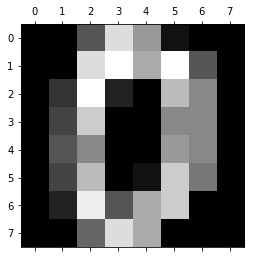

In [57]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 